# Develop a neural network that predicts next word

## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import heapq

## Loading the data

In [2]:
text = open('1661-0.txt',encoding='utf-8').read().lower()
print('Length:', len(text))

Length: 581888


## Data Preprocessing

In [3]:
c = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(c))
indices_char = dict((i, c) for i, c in enumerate(c))
 
print(f'unique chars: {len(c)}')

unique chars: 73


In [4]:
#chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


In [5]:
# generating our features and labels
#one hot encoding
X = np.zeros((len(sentences), seq_len, len(c)), dtype=np.bool)
y = np.zeros((len(sentences), len(c)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]

C:\Users\DELL\AppData\Local\Temp\ipykernel_11100\3870774836.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros((len(sentences), seq_len, len(c)), dtype=np.bool)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11100\3870774836.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), len(c)), dtype=np.bool)


'e'

In [10]:
X.shape

(193950, 40, 73)

In [11]:
y.shape

(193950, 73)

## Creating the model

In [6]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop

In [11]:
# Creating the model
model = Sequential()
model.add(LSTM(500, input_shape=(seq_len, len(c))))
model.add(Dense(len(c)))
model.add(Activation('softmax'))

## Model summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 500)               1148000   
                                                                 
 dense (Dense)               (None, 73)                36573     
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 1,184,573
Trainable params: 1,184,573
Non-trainable params: 0
_________________________________________________________________


## Training our model

In [13]:
# Training our model
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=10, 
                    shuffle=True).history

Epoch 1/10
1501/1501 [==============================] - 1279s 850ms/step - loss: 2.1635 - accuracy: 0.3736 - val_loss: 2.3975 - val_accuracy: 0.3345
Epoch 2/10
1501/1501 [==============================] - 1301s 867ms/step - loss: 1.6977 - accuracy: 0.4902 - val_loss: 2.0821 - val_accuracy: 0.4082
Epoch 3/10
1501/1501 [==============================] - 1229s 819ms/step - loss: 1.5422 - accuracy: 0.5355 - val_loss: 1.9451 - val_accuracy: 0.4536
Epoch 4/10
1501/1501 [==============================] - 1205s 803ms/step - loss: 1.4511 - accuracy: 0.5588 - val_loss: 1.8632 - val_accuracy: 0.4933
Epoch 5/10
1501/1501 [==============================] - 1158s 772ms/step - loss: 1.3853 - accuracy: 0.5765 - val_loss: 1.8904 - val_accuracy: 0.4902
Epoch 6/10
1501/1501 [==============================] - 1159s 772ms/step - loss: 1.3368 - accuracy: 0.5896 - val_loss: 1.8647 - val_accuracy: 0.4861
Epoch 7/10
1501/1501 [==============================] - 1159s 772ms/step - loss: 1.2913 - accuracy: 0.6002

## saving our model

In [14]:
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(history,open('history.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\activation
......vars
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-18 21:11:55         2381
metadata.json                                  2023-01-18 21:11:55           64
variables.h5                                   2023-01-18 21:11:55      9498840


## loading our model

In [7]:
model = pickle.load(open('model.pkl', 'rb'))
history = pickle.load(open('history.pkl', 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-01-18 21:11:54         2381
metadata.json                                  2023-01-18 21:11:54           64
variables.h5                                   2023-01-18 21:11:54      9498840
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\activation
......vars
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
...vars


## Model Evaluation

In [ ]:
#Model Evaluation
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

   1/6061 [..............................] - ETA: 2:46:19 - loss: 1.4539 - accuracy: 0.4688

## Plotting training and validation plots

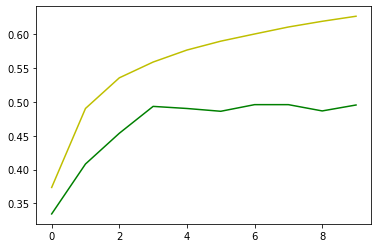

In [8]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.show()

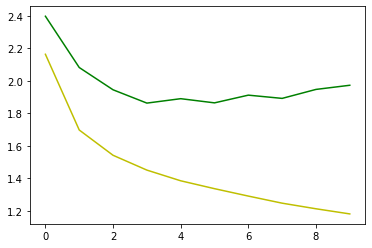

In [10]:
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.show()

In [11]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(c)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

## Functions to get next probable characters

In [12]:
#functions to get next probable characters
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [13]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [14]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

## Prediction

In [15]:
#Prediction
quotes = [   
    "It is not a lack of  love, but a  lack of friendship that makes unhappy marriages.",
    "Recurrent neural network (RNN)is a type of artificial neural network which uses sequential data or time series data.",
    "Machine learning is the science of getting computers to act without being explicitly programmed.",
    "Deep learning is subset of machine learning,which is essentially a neural network with three or more layers.",
    "The goal of AI is to  make a  compter like humans to solve complex problems.",
    "Statistics are defined as numerical data, and is the field of math that deals with the collection, tabulation and interpretation of numerical data."
    ]

In [16]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

it is not a lack of  love, but a  lack o
['f ', 'n ', 'ut ', 'pen ', 'ther ']

recurrent neural network (rnn)is a type 
['train ', 'of ', 'reason. ', 'and ', 'day. ']

machine learning is the science of getti
['ng ', 'on. ', 'me\nand ', 'tal ', 'c ']

deep learning is subset of machine learn
['ess ', ' that ', 't ', '\nand ', '. ']

the goal of ai is to  make a  compter li
['ke ', 'ttle ', 'ves ', 'ps ', 'ght ']

statistics are defined as numerical data
['ges ', 'n, ', 's ', 'on ', ' in ']

